In [25]:
import numpy as np
import pandas as pd
%matplotlib inline

#reaad the data from the csv file
data = pd.read_csv('D:/kaggleCompetition/BreastCancerData/BreastCancerData.csv',header=0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [26]:
#delete the column according the column name
data = data.drop("Unnamed: 32",1)

In [27]:
X = data.iloc[:,2:]
y = data.diagnosis

In [28]:
#vector the label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [29]:
 #random split the train data and the test data
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=1)

In [30]:
#StandardScaler the data,PCA,PipeLine Operation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=15)),('clf',LogisticRegression(random_state=1))])
pipe_lr.fit(train_X,train_y)

print(pipe_lr.named_steps['pca'].explained_variance_ratio_)
print('Test Accuracy:%.3f' % pipe_lr.score(test_X,test_y))

[ 0.45240302  0.17810349  0.09648793  0.06513888  0.05434259  0.04125135
  0.02307652  0.01623558  0.01329288  0.01164419  0.00966998  0.00839684
  0.00785899  0.00547696  0.00305354]
Test Accuracy:0.982


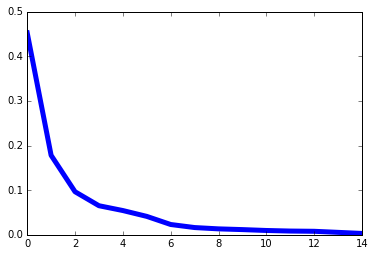

In [32]:
import matplotlib.pyplot as plt
plt.plot(pipe_lr.named_steps['pca'].explained_variance_ratio_,linewidth=5)

In [34]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4,random_state=1)
scores=[]
k=0
for train_index,test_index in skf.split(X,y):
    train_X,test_X = X.iloc[train_index],X.iloc[test_index]
    train_y,test_y = y[train_index],y[test_index]
    pipe_lr.fit(train_X,train_y)
    score = pipe_lr.score(test_X,test_y)
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc : %.3f' %(k+1, np.bincount(y[train_index]),score))
    k = k + 1

Fold: 1, Class dist.: [267 159], Acc : 0.972
Fold: 2, Class dist.: [268 159], Acc : 0.979
Fold: 3, Class dist.: [268 159], Acc : 0.972
Fold: 4, Class dist.: [268 159], Acc : 0.972


In [35]:
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))

CV accuracy : 0.974 +/- 0.003
